In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words
words = open("names.txt", 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [4]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one ?
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(f"{''.join(itos[i] for i in context)} ----> {itos[ix]}")
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [5]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [6]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [7]:
C = torch.randn((27, 2))

In [8]:
C[5]

tensor([-0.7437, -2.0570])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.7437, -2.0570])

In [11]:
C[X].shape

torch.Size([32, 3, 2])

In [12]:
X[13, 2]

tensor(1)

In [13]:
C[X][13, 2]

tensor([0.6267, 0.6226])

In [14]:
C[1]

tensor([0.6267, 0.6226])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [16]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [17]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [18]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [19]:
a = torch.arange(18)

In [20]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [21]:
a.storage()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20564\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [22]:
a.view(3, 2, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [23]:
emb.view(32, 6)

tensor([[ 0.6738, -1.0432,  0.6738, -1.0432,  0.6738, -1.0432],
        [ 0.6738, -1.0432,  0.6738, -1.0432, -0.7437, -2.0570],
        [ 0.6738, -1.0432, -0.7437, -2.0570,  2.7066,  0.9296],
        [-0.7437, -2.0570,  2.7066,  0.9296,  2.7066,  0.9296],
        [ 2.7066,  0.9296,  2.7066,  0.9296,  0.6267,  0.6226],
        [ 0.6738, -1.0432,  0.6738, -1.0432,  0.6738, -1.0432],
        [ 0.6738, -1.0432,  0.6738, -1.0432, -0.7675,  0.7648],
        [ 0.6738, -1.0432, -0.7675,  0.7648, -0.2744, -0.7955],
        [-0.7675,  0.7648, -0.2744, -0.7955,  1.1902,  0.9037],
        [-0.2744, -0.7955,  1.1902,  0.9037,  0.6492, -2.2485],
        [ 1.1902,  0.9037,  0.6492, -2.2485,  1.1902,  0.9037],
        [ 0.6492, -2.2485,  1.1902,  0.9037,  0.6267,  0.6226],
        [ 0.6738, -1.0432,  0.6738, -1.0432,  0.6738, -1.0432],
        [ 0.6738, -1.0432,  0.6738, -1.0432,  0.6267,  0.6226],
        [ 0.6738, -1.0432,  0.6267,  0.6226,  0.6492, -2.2485],
        [ 0.6267,  0.6226,  0.6492, -2.2

In [24]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [25]:
emb.view(32, 6) @ W1 + b1

tensor([[ 2.7466,  0.0623,  0.2950,  ...,  3.7616,  1.6010, -2.0466],
        [ 4.7927, -1.9321, -0.3236,  ...,  6.3674,  1.6369, -1.7861],
        [ 2.8735,  4.9194,  2.2129,  ..., -1.0477,  0.2251, -5.1268],
        ...,
        [ 0.2865,  4.9722, -2.5168,  ...,  0.2875,  2.5191, -5.0726],
        [-1.1805, -1.3601,  0.4446,  ..., -1.1500,  1.1962, -2.1336],
        [-0.7124, -1.0287,  3.2460,  ...,  0.9865, -1.2867,  2.3504]])

In [26]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [27]:
h

tensor([[ 0.9918,  0.0622,  0.2868,  ...,  0.9989,  0.9218, -0.9672],
        [ 0.9999, -0.9589, -0.3127,  ...,  1.0000,  0.9270, -0.9453],
        [ 0.9936,  0.9999,  0.9764,  ..., -0.7809,  0.2213, -0.9999],
        ...,
        [ 0.2789,  0.9999, -0.9871,  ...,  0.2799,  0.9871, -0.9999],
        [-0.8276, -0.8764,  0.4175,  ..., -0.8178,  0.8325, -0.9723],
        [-0.6122, -0.7734,  0.9970,  ...,  0.7559, -0.8582,  0.9820]])

In [28]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [29]:
logits = h @ W2 + b2

In [30]:
logits.shape

torch.Size([32, 27])

In [31]:
counts = logits.exp()

In [32]:
probs = counts / counts.sum(1, keepdim=True)

In [33]:
probs.shape

torch.Size([32, 27])

In [34]:
probs[0].sum()

tensor(1.)

In [35]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [36]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [37]:
probs[torch.arange(32), Y]

tensor([4.8826e-06, 5.1375e-09, 3.4312e-04, 8.3515e-01, 8.2775e-10, 9.3505e-07,
        1.9694e-06, 4.1683e-09, 5.9735e-04, 8.7923e-05, 2.5493e-06, 5.2284e-08,
        9.1310e-01, 3.9820e-02, 3.8999e-06, 7.4821e-03, 4.8879e-04, 5.3884e-08,
        4.9892e-02, 4.9159e-08, 9.4378e-11, 8.2141e-11, 2.0863e-11, 1.3276e-06,
        1.5090e-02, 6.7912e-07, 2.2620e-09, 6.0960e-10, 1.5287e-02, 2.6064e-04,
        1.7719e-01, 3.7684e-07])

In [38]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(12.2147)

## Now combined all in one

In [39]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [40]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g, requires_grad=True)
W1 = torch.randn((6, 100), generator=g, requires_grad=True)
b1 = torch.randn(100, generator=g, requires_grad=True)
W2 = torch.randn((100, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

In [41]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [42]:
# forward pass
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y) # reduces the memory required and also the caluclation needed for back propagation
loss

tensor(17.7697, grad_fn=<NllLossBackward0>)

In [43]:
logits = torch.tensor([-5, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [44]:
for _ in range(1000):

    # forward pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

0.25613853335380554


In [45]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3348, 17.7905, 20.6014, 20.6120, 16.7355, 13.3348, 15.9984, 14.1723,
        15.9146, 18.3614, 15.9396, 20.9265, 13.3348, 17.1090, 17.1319, 20.0601,
        13.3348, 16.5892, 15.1017, 17.0581, 18.5861, 15.9670, 10.8740, 10.6871,
        15.5056, 13.3348, 16.1794, 16.9743, 12.7426, 16.2008, 19.0845, 16.0195],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [46]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## Now train on full dataset

In [47]:
# build the dataset
block_size = 3  # context length: how many characters do we take to predict the next one 

X, Y = [], []
for w in words:

    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [86]:
# build dataset
block_size = (
    3  # context length: how many characters do we take to predict the next one?
)


def build_dataset(words):
    X, Y = [], []
    for w in words:

        # print(w)
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y


import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [87]:
Xtr.shape, Ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [168]:
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C = torch.randn((27, 20), generator=g, requires_grad=True)
W1 = torch.randn((60, 200),   generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)
W2 = torch.randn((200, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

In [169]:
sum(p.nelement() for p in parameters)  # number of parameters in total

18167

In [170]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [171]:
lri = []
lossi = []
stepi = []

In [167]:
torch.randint(0, Xtr.shape[0], (48,))

tensor([111338, 102721,  47935,  85024,  85798,  76562,    889, 108612,  13588,
         12577,    235, 179066,  12422,   2433,   5800, 122755,   3509, 151501,
        109423,  26015,  53231,   9308, 131129,  76465, 137790, 169491,  31975,
        130812, 172221,  71778, 142680, 144515,  13386,  53419,  21655,   1913,
        108632,  50477,  86351, 126888,  73590,  22036, 162496,  74247, 142729,
         36349, 123070,  63073])

In [172]:
for i in range(500000):

    ix = torch.randint(0, Xtr.shape[0], (48,))
    # forward pass
    emb = C[Xtr[ix]]  # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 60) @ W1 + b1)  # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    
    if i < 100000:
        lr = 0.1
    elif i > 100000 and i < 200000:
        lr = 0.05
    elif i > 200000 and i < 300000:
        lr = 0.025
    elif i > 300000 and i < 400000:
        lr = 0.0125
    elif i > 400000 and i < 500000:
        lr = 0.00625
    
    # update
    for p in parameters:
        p.data += -lr * p.grad

    # track status
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

# print(loss.item())

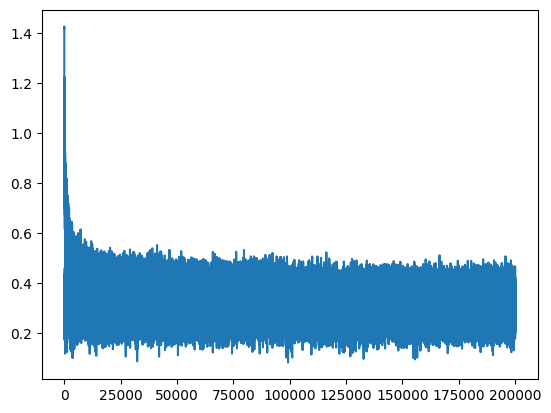

In [164]:
plt.plot(stepi, lossi)

In [173]:
emb = C[Xtr]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Ytr)
print(f"training loss: {loss.item()}")

training loss: 2.0298733711242676


In [175]:
emb = C[Xdev]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 60) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Ydev)
print(f"validation loss: {loss.item()}")

validation loss: 2.125441551208496


In [54]:
# plt.plot(lri, lossi)

In [55]:
torch.randint(0, X.shape[0], (32,))


tensor([120690,  69382, 156309,  41064,  65851,  45159, 223983,  27469,  38713,
         15121,  30061, 191964,  80972, 145578, 216784, 111427, 196211, 135670,
        127343,  62331,  26833,  50121, 113629,  50720, 193730, 196864, 104086,
        127289,  13146, 134845,  34158,  27547])

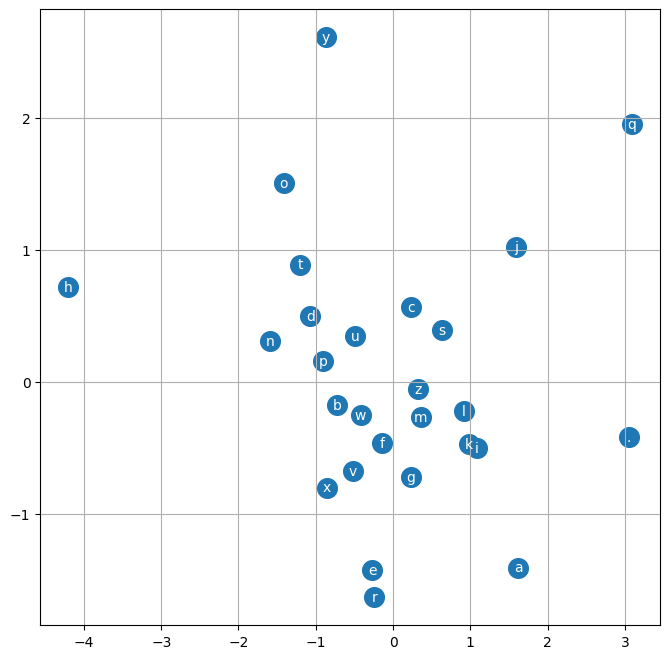

In [176]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(
        C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white"
    )
plt.grid("minor")

In [79]:
# training split, dev/validation split, test split
#       80%              10%               10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [81]:
len(words)

32033

In [82]:
n1

25626

In [83]:
n2

28829

In [84]:
n2-n1

3203

In [85]:
len(words) - n2

3204

In [116]:
C

tensor([[ 3.4830e-01, -3.8814e-01],
        [-1.7332e-01, -3.7246e-01],
        [ 9.7525e-02,  2.1666e-01],
        [ 5.5279e-01,  1.6495e-01],
        [ 2.2239e-01,  3.7535e-01],
        [-3.9928e-01, -1.4814e-01],
        [ 2.2405e-01,  2.5002e-01],
        [ 8.4524e-01,  2.9848e+00],
        [-1.0470e-01,  2.7400e-01],
        [-8.1053e-01, -2.7461e-03],
        [ 2.1311e-03,  4.4921e-01],
        [ 4.0670e-01,  2.8305e-01],
        [ 3.0768e-02,  9.7853e-01],
        [ 6.5159e-01,  5.8633e-01],
        [-4.6128e-01,  6.0754e-01],
        [-5.4544e-01, -5.0975e-01],
        [ 2.9114e-01,  1.3804e-01],
        [-5.2118e-01,  1.8930e+00],
        [-6.5381e-03,  5.5663e-01],
        [ 3.3992e-01,  7.5051e-02],
        [ 2.9083e-01,  1.5690e-01],
        [-7.1355e-01, -3.0660e-01],
        [ 3.9347e-01,  6.5723e-01],
        [ 2.8061e-01,  3.6915e-01],
        [ 1.9318e-01,  1.7533e-01],
        [-1.0106e+00,  3.6991e-01],
        [ 4.1469e-01,  3.3861e-01]], requires_grad=True)

In [178]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmah.
amillivi.
kimri.
reh.
cassanden.
jazhntley.
elynn.
kaeli.
nellara.
chaiiv.
kaleigh.
ham.
joce.
quintis.
lilea.
jadis.
wavero.
dearynn.
jace.
pius.
